<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_3_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [ ]:
#Завдання 1
#Вивести перших 5 рядків.

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#Завдання 2
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

missing_values = df.isnull().sum()

df.fillna(df.mean(), inplace=True)

In [ ]:
#Завдання 3
#Перевірка та видалення дублікатів.

duplicates = df.duplicated().sum()

df = df.drop_duplicates()

In [ ]:
#Завдання 4
#Замінити бінарні ознаки. У стовпчику «Вік» спочатку перевірте унікальні значення.

unique_ages = df['age'].unique()
print(unique_ages)

for index, value in enumerate(df['sex']):
    if value > 0:
        df.at[index, 'sex'] = 1
    else:
        df.at[index, 'sex'] = 0
df['sex'].unique()

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


array([1., 0.])

In [ ]:
#Завдання 5
#Перевірити тип даних. При необхідності замінити тив даних начисловий.

print(df.dtypes)

df = df.apply(pd.to_numeric)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


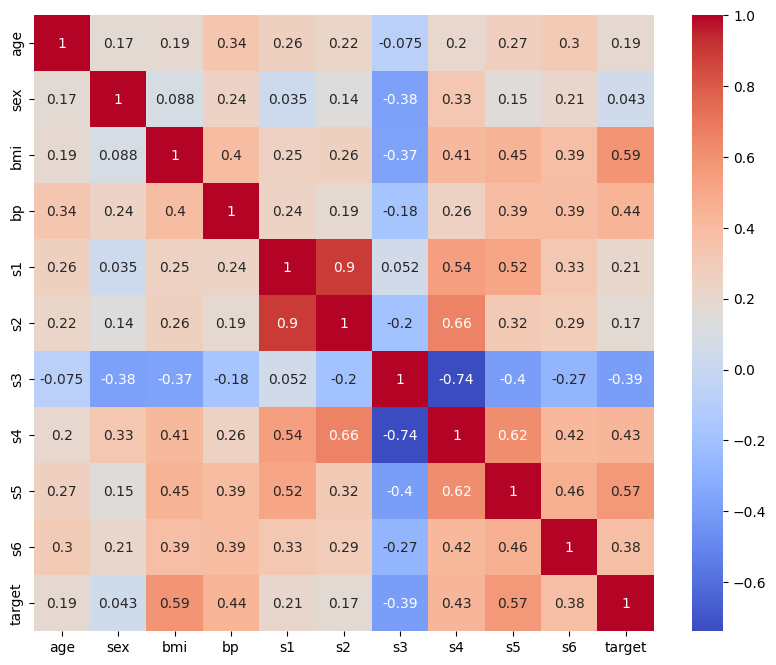

In [ ]:
#Завдання 6
#Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.

import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

corr_target = correlation['target'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Завдання 7
#Масштабувати ознаки.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

In [ ]:
#Завдання 8
#Поділити дані на тренувальну і тестову вибірки.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.2, random_state=42)

In [ ]:
#Завдання 9
#Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
#Завдання 10
#Вивести коефіцієнт детермінації і середньоквадратичну помилку.

from sklearn.metrics import r2_score, mean_squared_error

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Лінійна регресія - R2: {r2_lin}, MSE: {mse_lin}')
print(f'RandomForest регресія - R2: {r2_rf}, MSE: {mse_rf}')

Лінійна регресія - R2: 0.4526027629719195, MSE: 2900.1936284934814
RandomForest регресія - R2: 0.44074575666493343, MSE: 2963.013847191012


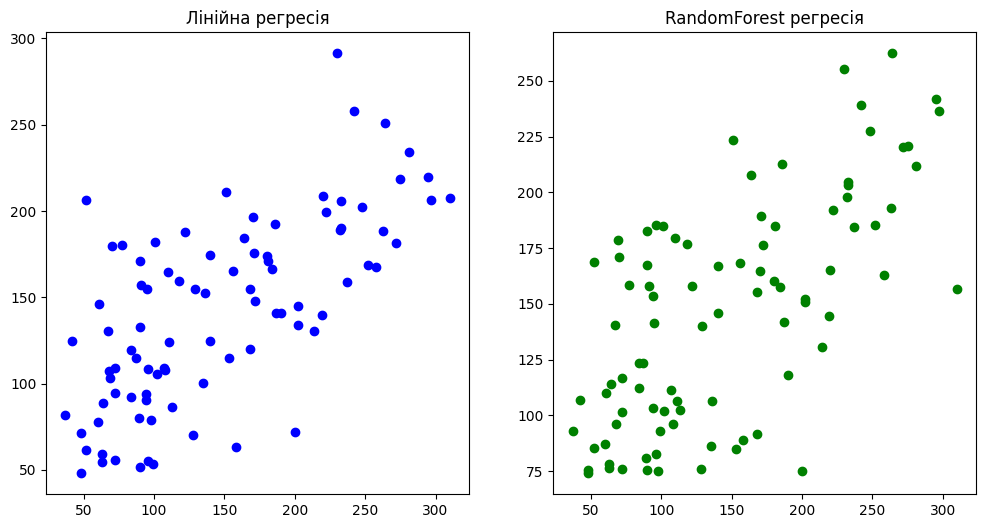

In [ ]:
#Завдання 11
#Побудувати графіки.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue')
plt.title('Лінійна регресія')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.title('RandomForest регресія')

plt.show()

Завдання 12
Зробити ВИСНОВКИ.

Лінійна регресія:

Коефіцієнт детермінації (R²) для моделі лінійної регресії становить 0.45, це означає, що модель пояснює приблизно 45% варіації в цільовій змінній (прогресі діабету). Це показник середньої точності, що вказує на те, що модель не в повній мірі враховує складні залежності між ознаками та результатом.
Середньоквадратична помилка (MSE) становить 2900.19, що є мірою середньої похибки в передбаченнях моделі. Це досить високе значення, яке свідчить про помітні відхилення між фактичними та передбаченими значеннями.

RandomForest регресія:

Коефіцієнт детермінації (R²) для моделі RandomForest регресії дорівнює 0.44, що дуже близьке до результату лінійної регресії. Це означає, що RandomForest пояснює приблизно 44% варіації в даних, що трохи гірше за лінійну регресію.
Середньоквадратична помилка (MSE) становить 2963.01, що також трохи гірше за результат лінійної регресії, але незначно.